In [1]:
import torch, torchvision
import torchvision.models as models

import matplotlib.pyplot as plt
from PIL import Image

Very Deep Convolutional Networks for Large-Scale Image Recognition, Karen Simonyan, Andrew Zisserman

https://arxiv.org/abs/1409.1556


![](./data/vgg_fig1.png)

In [2]:
models.vgg16()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [9]:
cifar10 = torchvision.datasets.CIFAR10(root='./', download=True)

to_tensor = torchvision.transforms.Compose([    # module을 동시에 input할 수 있음
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
                                ])

vgg16 = models.vgg16(pretrained=True)

Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
for img in cifar10:

    img = to_tensor(img[0])

    print(img.shape)

    logit = vgg16(img.unsqueeze(0))

    print(logit.shape)
    break

torch.Size([3, 32, 32])
torch.Size([1, 1000])


## Make dataloader



See the document!

https://pytorch.org/docs/stable/data.html

In [4]:
cifar10 = torchvision.datasets.CIFAR10(root='./', download=True)

to_tensor = torchvision.transforms.Compose([    # module을 동시에 input할 수 있음
                torchvision.transforms.ToTensor(),
                # torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                #                  std=[0.229, 0.224, 0.225])
                                ])

vgg16 = models.vgg16(pretrained=True)

Using downloaded and verified file: ./cifar-10-python.tar.gz
Extracting ./cifar-10-python.tar.gz to ./


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
cifar10 = torchvision.datasets.CIFAR10(root='./', download=True, transform=to_tensor)  ## torch.utils.data.Dataset

dataloader = torch.utils.data.DataLoader(cifar10, batch_size=8, shuffle=True, num_workers=2)

Files already downloaded and verified


In [6]:
dataloader

torch.Size([8, 3, 32, 32]) torch.Size([8])


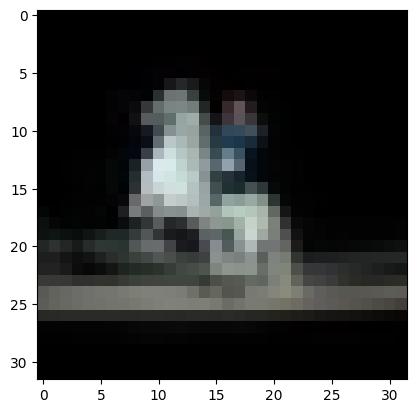

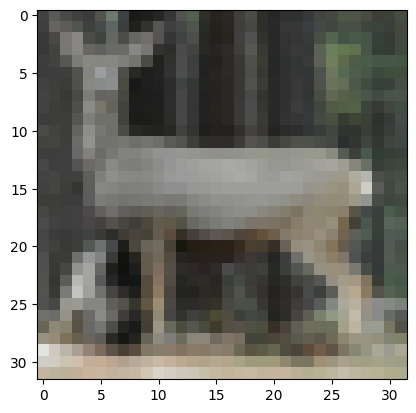

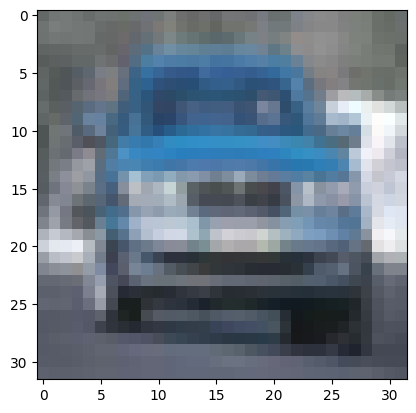

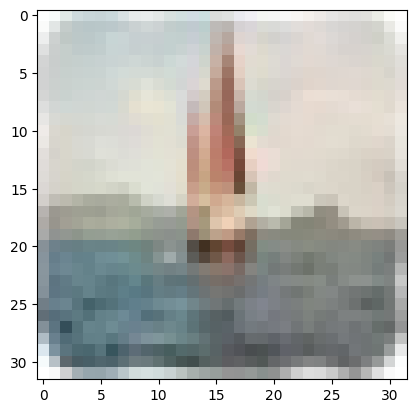

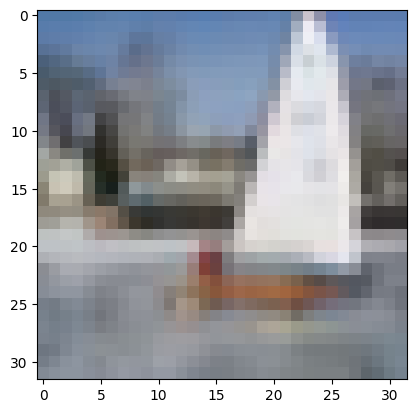

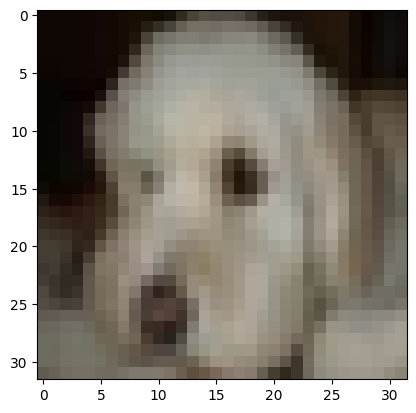

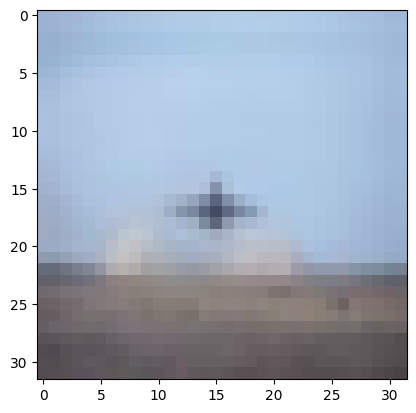

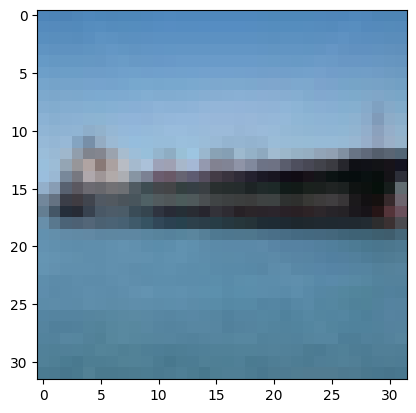

In [7]:
for idx, data in enumerate(dataloader):

    img, gt = data

    print(img.shape, gt.shape)

    for im in img:
        plt.imshow(torchvision.transforms.ToPILImage()(im))
        plt.show()

    ## TODO: run the vgg16 network

    break

In [9]:
cifar10 = torchvision.datasets.CIFAR10(root='./', download=True, transform=to_tensor)  ## torch.utils.data.Dataset

dataloader = torch.utils.data.DataLoader(cifar10, batch_size=8, shuffle=True, num_workers=2)

Files already downloaded and verified


In [10]:
cifar10 = torchvision.datasets.CIFAR10(root='./', download=True)

to_tensor = torchvision.transforms.Compose([    # module을 동시에 input할 수 있음
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
                                ])

vgg16 = models.vgg16(pretrained=True)

Files already downloaded and verified


torch.Size([8, 3, 32, 32]) torch.Size([8])


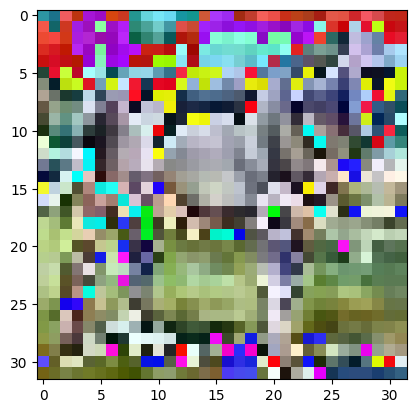

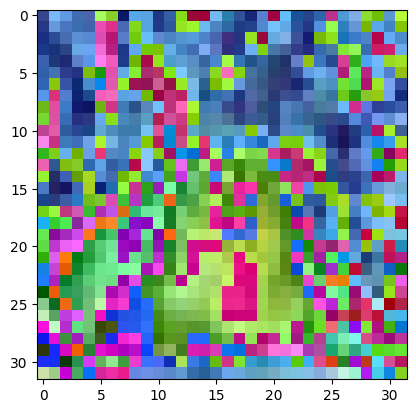

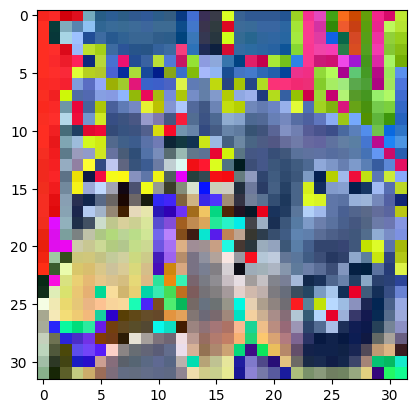

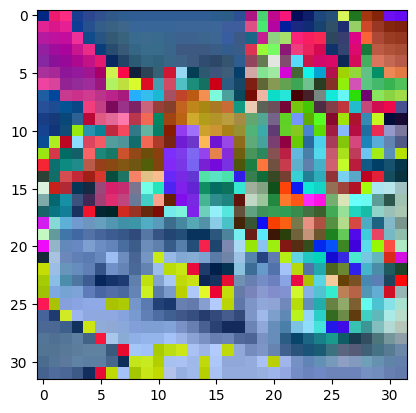

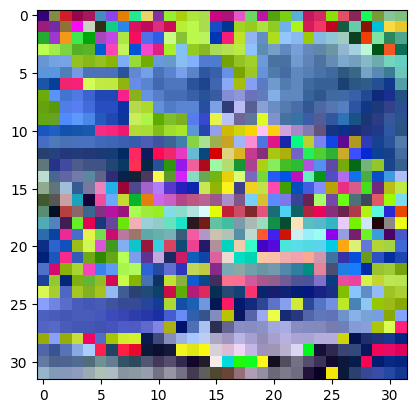

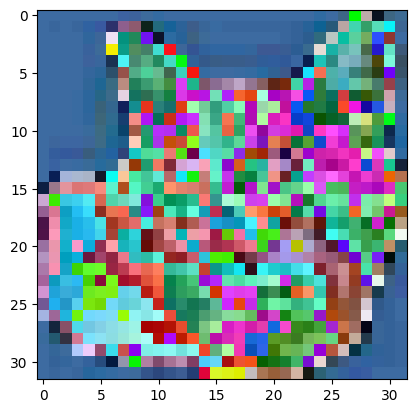

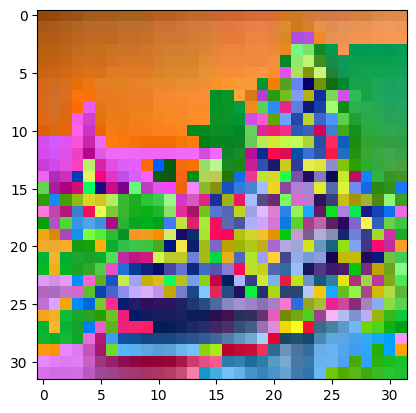

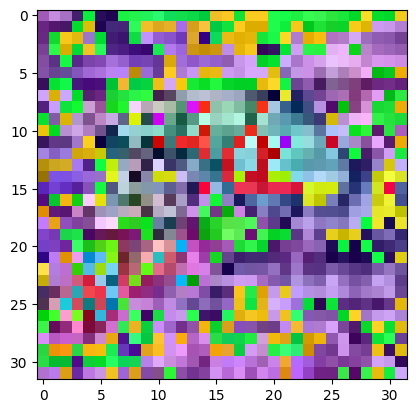

In [11]:
for idx, data in enumerate(dataloader):

    img, gt = data

    print(img.shape, gt.shape)

    for im in img:
        plt.imshow(torchvision.transforms.ToPILImage()(im))
        plt.show()

    ## TODO: run the vgg16 network

    break

In [12]:
for idx, data in enumerate(dataloader):

    img, gt = data

    print(img.shape, gt.shape)

    # for im in img:
    #     plt.imshow(torchvision.transforms.ToPILImage()(im))
    #     plt.show()

    ## TODO: run the vgg16 network
    logits = vgg16(img)

    print(logits.shape)

    break

torch.Size([8, 3, 32, 32]) torch.Size([8])
torch.Size([8, 1000])


## Model variations

VGG11

VGG16

VGG19

In [ ]:
models.vgg11()



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [ ]:
models.vgg11_bn()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): MaxPool2d(ke

In [ ]:
models.vgg19()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd